In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nt = 500
nx = 51
ny = 51

Lx = 2
Ly = 2

nu = 0.1
dt = .001

dx = Lx / (nx-1) # x-length = 2
dy = Ly / (ny-1) # y-length = 2

In [3]:
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)

In [4]:
x

array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
       0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
       0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
       1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
       1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  ])

In [5]:
comb = np.zeros((ny, nx))

In [6]:
comb.shape

(51, 51)

In [7]:
# current time step, i.e., u(x,y), v(x,y)
u = np.ones((ny, nx)) 
v = np.ones((ny, nx))

# previous time step
un = np.zeros((ny, nx))
vn = np.zeros((ny, nx))

# current time step, i.e., u(t,x,y), v(t,x,y)
uf = np.ones((nt, ny, nx))
vf = np.ones((nt, ny, nx))

In [8]:
u.shape

(51, 51)

In [9]:
uf.shape

(500, 51, 51)

In [10]:
# External and Internal BCs
u[int(0.75/dy):int(1.25/dy+1) , int(0.75/dx):int(1.25/dx+1)] = 5
v[int(0.75/dy):int(1.25/dy+1) , int(0.75/dx):int(1.25/dx+1)] = 5

# ICs (t=0)
uf[0 ,int(0.75/dy):int(1.25/dy+1) , int(0.75/dx):int(1.25/dx+1)] = 5
vf[0 ,int(0.75/dy):int(1.25/dy+1) , int(0.75/dx):int(1.25/dx+1)] = 5

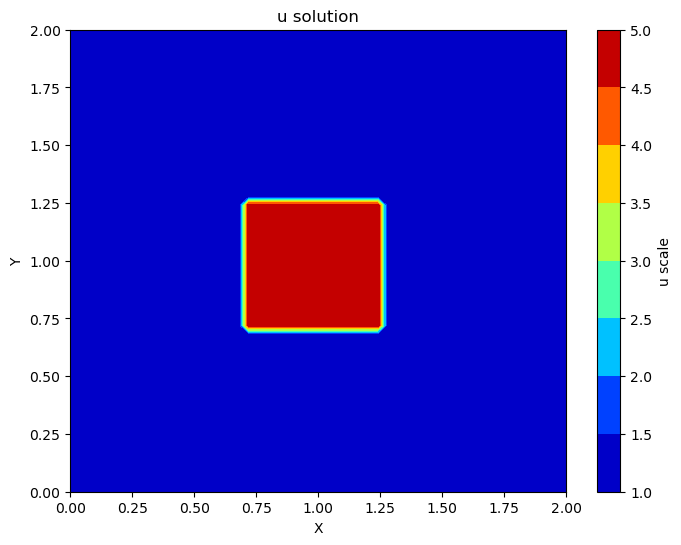

In [11]:
X, Y = np.meshgrid(x,y)

plt.figure(figsize=(8,6))
contour = plt.contourf(X, Y, u[:], cmap='jet')
plt.title("u solution")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("u scale")

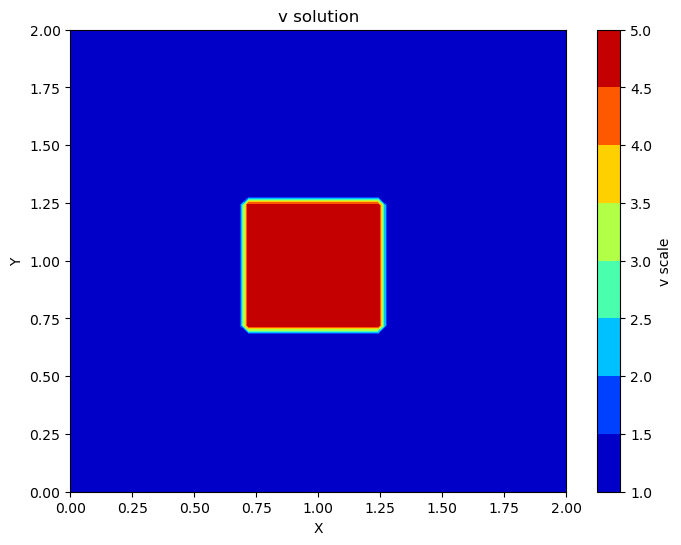

In [12]:
X, Y = np.meshgrid(x,y)

plt.figure(figsize=(8,6))
contour = plt.contourf(X, Y, v[:], cmap='jet')
plt.title("v solution")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("v scale")

In [13]:
for t in range(1, nt):
    un = u.copy()
    vn = v.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1): 
            u[i,j] = (un[i, j] - (un[i, j] * dt/dx * (un[i, j] - un[i-1, j])) - vn[i, j] * dt/dy * (un[i, j] - un[i, j-1])) + \
                    (nu*dt/(dx**2)) * (un[i+1,j]-2*un[i,j]+un[i-1,j])+(nu*dt/(dx**2))*(un[i,j-1]-2*un[i,j]+un[i,j+1])
            v[i,j] = (vn[i, j] - (un[i, j] * dt/dx * (vn[i, j] - vn[i-1, j])) - vn[i, j] * dt/dy * (vn[i, j] - vn[i, j-1])) + \
                    (nu*dt/(dx**2)) * (vn[i+1,j]-2*vn[i,j]+vn[i-1,j])+(nu*dt/(dx**2))*(vn[i,j-1]-2*vn[i,j]+vn[i,j+1])
            uf[t,i,j] = u[i,j]
            vf[t,i,j] = v[i,j]
    u[:,0 ] = 1
    u[:,-1] = 1
    u[0,: ] = 1
    u[-1,:] = 1
    v[:,0 ] = 1
    v[:,-1] = 1
    v[0,: ] = 1
    v[-1,:] = 1        

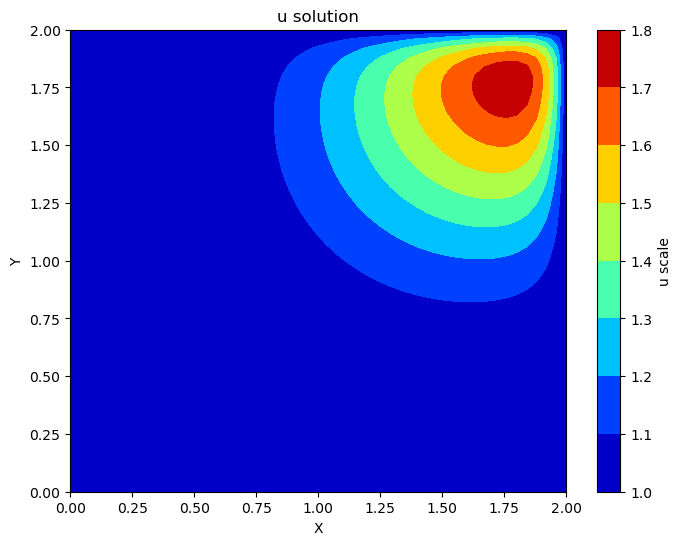

In [14]:
X, Y = np.meshgrid(x,y)

plt.figure(figsize=(8,6))
contour = plt.contourf(X, Y, u[:], cmap='jet')
plt.title("u solution")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("u scale")

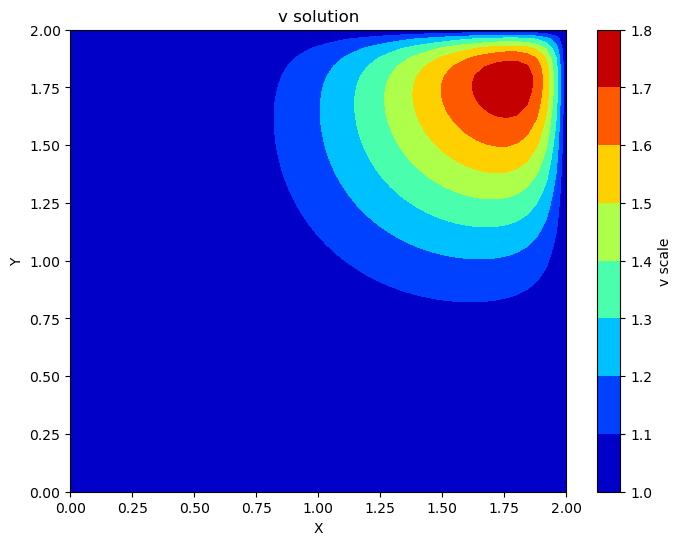

In [17]:
X, Y = np.meshgrid(x,y)

plt.figure(figsize=(8,6))
contour = plt.contourf(X, Y, v[:], cmap='jet')
plt.title("v solution")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("v scale")

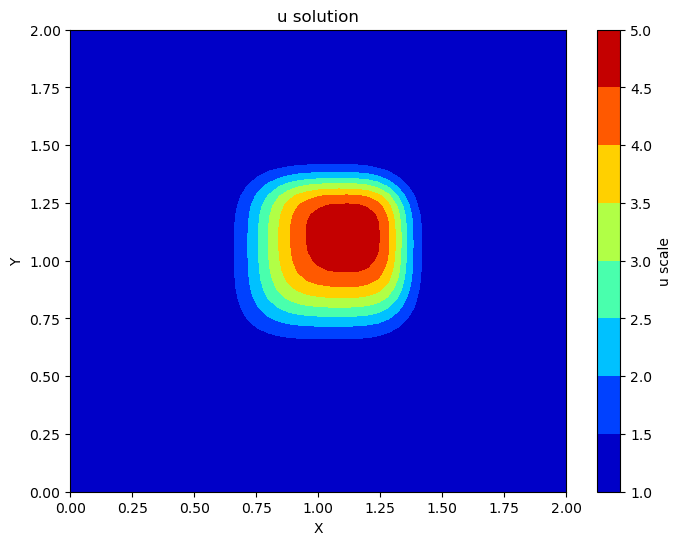

In [18]:
X, Y = np.meshgrid(x,y)

#set the time as you like
u = uf[30,:,:]

plt.figure(figsize=(8,6))
contour = plt.contourf(X, Y, u[:], cmap='jet')
plt.title("u solution")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("u scale")